In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import spacy

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn import metrics

from sklearn.metrics import classification_report

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from string import punctuation
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset_all_data.csv')

In [ ]:
data.shape

(9144, 4)

In [ ]:
data.head()

,text,gender,age,sarcasm
0,Быстро работает паблик. Его уже вылечили и он ...,2,34,0
1,"это был я ,если вы о комментариях.А вы прям са...",2,43,1
2,"Георгий, вам начислено 50 + к вашей карме. Ско...",2,43,1
3,"Вы рачьё поганое , тот, кто проигнорировал ком...",2,29,0
4,вы плять гоните пластик заваривать?по возможно...,2,43,0


In [ ]:
data["sarcasm"].value_counts()

sarcasm
0    7620
1    1524
Name: count, dtype: int64

In [ ]:
y = data['sarcasm']
X = data.drop('sarcasm', axis=1)

In [ ]:
def feature_engineering(choice_transformer, choice_ngrams):
    # числовые характеристики нормализуем: imputer обрабатывает наны, scaler масштабирует
    numeric_features = ['age', 'gender']
    numeric_transformer = Pipeline(
        steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
    )

    # текстовые характеристики обрабатываем: либо tf-idf, либо мешок слов
    text_features = 'text'
    if choice_transformer == 'tfidf':
        text_transformer = TfidfVectorizer(ngram_range=choice_ngrams, tokenizer=word_tokenize, stop_words='english')
    else:
        text_transformer = CountVectorizer(ngram_range=choice_ngrams, tokenizer=word_tokenize, stop_words='english')

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("txt", text_transformer, text_features),
        ]
    )
    return preprocessor

In [ ]:
def modelfit(model):
    model.fit(Xtrain, ytrain)

    ypredtest = model.predict(Xtest)
    ypredtrain = model.predict(Xtrain)

    print('RESULTS:\nroc-auc_score:\n', 'train:', roc_auc_score(ytrain, ypredtrain), 'test:', roc_auc_score(ytest, ypredtest),
          '\nf1_score:\n', 'train:', f1_score(ytrain, ypredtrain), 'test:', f1_score(ytest, ypredtest),
          '\nclassification_report\ntrain:\n', classification_report(ytrain, ypredtrain), '\ntest:\n',  classification_report(ytest, ypredtest))

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)

TF-IDF unigrams

In [ ]:
preprocessor = feature_engineering('tfidf', (1, 1))

clfLR = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(class_weight='balanced'))]
)

clfSVC = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(class_weight='balanced'))]
)

Logistic Regression

In [ ]:
modelfit(clfLR)

c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS:
roc-auc_score:
 train: 0.9315091702031915 test: 0.6802568736285013 
f1_score:
 train: 0.7854984894259819 test: 0.4340320591861899 
classification_report
train:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95      6096
           1       0.66      0.96      0.79      1219

    accuracy                           0.91      7315
   macro avg       0.83      0.93      0.87      7315
weighted avg       0.94      0.91      0.92      7315
 
test:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      1524
           1       0.35      0.58      0.43       305

    accuracy                           0.75      1829
   macro avg       0.63      0.68      0.64      1829
weighted avg       0.81      0.75      0.77      1829



SVC

In [ ]:
modelfit(clfSVC)

c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


RESULTS:
roc-auc_score:
 train: 0.9732606838572988 test: 0.6697807753539005 
f1_score:
 train: 0.890521675238795 test: 0.43235704323570434 
classification_report
train:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      6096
           1       0.81      0.99      0.89      1219

    accuracy                           0.96      7315
   macro avg       0.90      0.97      0.93      7315
weighted avg       0.97      0.96      0.96      7315
 
test:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1524
           1       0.38      0.51      0.43       305

    accuracy                           0.78      1829
   macro avg       0.64      0.67      0.65      1829
weighted avg       0.81      0.78      0.79      1829



TF-IDF bigrams

In [ ]:
preprocessor = feature_engineering('tfidf', (2, 2))

clfLR = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(class_weight='balanced'))]
)

clfSVC = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(class_weight='balanced'))]
)

In [ ]:
modelfit(clfLR)

c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


RESULTS:
roc-auc_score:
 train: 0.9895829296204669 test: 0.640931973667226 
f1_score:
 train: 0.959272439699486 test: 0.3946980854197349 
classification_report
train:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6096
           1       0.93      1.00      0.96      1219

    accuracy                           0.99      7315
   macro avg       0.96      0.99      0.98      7315
weighted avg       0.99      0.99      0.99      7315
 
test:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1524
           1       0.36      0.44      0.39       305

    accuracy                           0.78      1829
   macro avg       0.62      0.64      0.63      1829
weighted avg       0.80      0.78      0.78      1829



In [ ]:
modelfit(clfSVC)

c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


RESULTS:
roc-auc_score:
 train: 0.9933559627852097 test: 0.6252000774493353 
f1_score:
 train: 0.9754921655283245 test: 0.3736263736263736 
classification_report
train:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      6096
           1       0.96      1.00      0.98      1219

    accuracy                           0.99      7315
   macro avg       0.98      0.99      0.99      7315
weighted avg       0.99      0.99      0.99      7315
 
test:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1524
           1       0.36      0.39      0.37       305

    accuracy                           0.78      1829
   macro avg       0.62      0.63      0.62      1829
weighted avg       0.79      0.78      0.79      1829



BOW unigrams

In [ ]:
preprocessor = feature_engineering('bow', (1, 1))

clfLR = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(class_weight='balanced'))]
)

clfSVC = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(class_weight='balanced'))]
)

In [ ]:
modelfit(clfLR)

c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS:
roc-auc_score:
 train: 0.9978674540682414 test: 0.6340680263327739 
f1_score:
 train: 0.9894480519480519 test: 0.39568345323741005 
classification_report
train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6096
           1       0.98      1.00      0.99      1219

    accuracy                           1.00      7315
   macro avg       0.99      1.00      0.99      7315
weighted avg       1.00      1.00      1.00      7315
 
test:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      1524
           1       0.44      0.36      0.40       305

    accuracy                           0.82      1829
   macro avg       0.66      0.63      0.64      1829
weighted avg       0.80      0.82      0.81      1829



In [ ]:
modelfit(clfSVC)

c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


RESULTS:
roc-auc_score:
 train: 0.9540651463378399 test: 0.6451981412159545 
f1_score:
 train: 0.8618662747979428 test: 0.403030303030303 
classification_report
train:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      6096
           1       0.78      0.96      0.86      1219

    accuracy                           0.95      7315
   macro avg       0.89      0.95      0.92      7315
weighted avg       0.96      0.95      0.95      7315
 
test:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      1524
           1       0.37      0.44      0.40       305

    accuracy                           0.78      1829
   macro avg       0.63      0.65      0.64      1829
weighted avg       0.80      0.78      0.79      1829



BOW bigrams

In [ ]:
preprocessor = feature_engineering('bow', (2, 2))

clfLR = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(class_weight='balanced'))]
)

clfSVC = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(class_weight='balanced'))]
)

In [ ]:
modelfit(clfLR)

c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS:
roc-auc_score:
 train: 1.0 test: 0.5593358719504324 
f1_score:
 train: 1.0 test: 0.22680412371134023 
classification_report
train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6096
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      7315
   macro avg       1.00      1.00      1.00      7315
weighted avg       1.00      1.00      1.00      7315
 
test:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1524
           1       0.53      0.14      0.23       305

    accuracy                           0.84      1829
   macro avg       0.69      0.56      0.57      1829
weighted avg       0.80      0.84      0.79      1829



In [ ]:
modelfit(clfSVC)

c:\Users\Aleksandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


RESULTS:
roc-auc_score:
 train: 0.9999179790026247 test: 0.5367152876382255 
f1_score:
 train: 0.999589995899959 test: 0.15512465373961218 
classification_report
train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6096
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      7315
   macro avg       1.00      1.00      1.00      7315
weighted avg       1.00      1.00      1.00      7315
 
test:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      1524
           1       0.50      0.09      0.16       305

    accuracy                           0.83      1829
   macro avg       0.67      0.54      0.53      1829
weighted avg       0.79      0.83      0.78      1829



BERT

In [ ]:
!pip install transformers

In [ ]:
!pip install torcheval

In [ ]:
import transformers
from transformers import AutoModel, BertModel, AutoTokenizer, BertTokenizer, PreTrainedTokenizerFast, AdamW, get_linear_schedule_with_warmup
import torch.nn.functional as F

import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.nn.utils import clip_grad_norm_
from torch.utils.data import Dataset, DataLoader
from torcheval.metrics.functional import binary_f1_score

from sklearn.utils import shuffle, class_weight

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ai-forever/sbert_large_nlu_ru")
model = AutoModel.from_pretrained("ai-forever/sbert_large_nlu_ru")

In [ ]:
MAX_LEN = 160

In [ ]:
yweights = class_weight.compute_class_weight('balanced', classes=np.unique(data.sarcasm), y=data.sarcasm)

In [ ]:
yweights = torch.from_numpy(yweights)
yweights = yweights.to(torch.float32)

In [ ]:
yweights

tensor([0.6000, 3.0000])

In [ ]:
class SarcasmDataset(Dataset):

  def __init__(self, text, age, gender, targets, tokenizer, max_len):
    self.text = text
    self.targets = targets
    self.age = age
    self.gender = gender
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.text)

  def __getitem__(self, item):
    text = str(self.text[item])
    target = self.targets[item]
    age = self.age[item]
    gender = self.gender[item]

    encoding = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
      return_tensors='pt',
      truncation=True
    )

    return {
      'text': text,
      'age': age,
      'gender': gender,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
df_train, df_test = train_test_split(data, test_size=0.1, random_state=RANDOM_SEED, stratify=data.sarcasm)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED, stratify=df_test.sarcasm)

In [ ]:
'Без stratify'
print(df_train.sarcasm.value_counts())
print(df_val.sarcasm.value_counts())
print(df_test.sarcasm.value_counts())

sarcasm
0    6862
1    1367
Name: count, dtype: int64
sarcasm
0    372
1     85
Name: count, dtype: int64
sarcasm
0    386
1     72
Name: count, dtype: int64


In [ ]:
'С stratify'
print(df_train.sarcasm.value_counts())
print(df_val.sarcasm.value_counts())
print(df_test.sarcasm.value_counts())

sarcasm
0    6858
1    1371
Name: count, dtype: int64
sarcasm
0    381
1     76
Name: count, dtype: int64
sarcasm
0    381
1     77
Name: count, dtype: int64


In [ ]:
df_train.shape, df_val.shape, df_test.shape

((8229, 4), (457, 4), (458, 4))

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = SarcasmDataset(
    text=df.text.to_numpy(),
    targets=df.sarcasm.to_numpy(),
    age=df.age.to_numpy(),
    gender=df.gender.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size
  )

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(120138, 1024, padding_idx=0)
    (position_embeddings): Embedding(512, 1024)
    (token_type_embeddings): Embedding(2, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-23): 24 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1,

In [ ]:
class SarcasmClassifier(nn.Module):

  def __init__(self, n_classes):
    super().__init__()
    self.bert = model
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False)
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
my_model = SarcasmClassifier(2)
my_model = my_model.to(device)

In [ ]:
my_model

SarcasmClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(120138, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=

In [ ]:
EPOCHS = 2

#optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
optimizer = AdamW(filter(lambda p: p.requires_grad, my_model.parameters()), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss(weight=yweights).to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train_epoch(
  my_model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  #print('i\'m here')
  my_model = my_model.train()

  losses = []
  correct_predictions = 0
  all_preds = []
  all_targets = []

  #print('now here')

  for number, d in enumerate(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = my_model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    preds = torch.argmax(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    all_preds += list(preds.cpu().numpy())
    all_targets += list(targets.cpu().numpy())

    loss.backward()
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    if ((number+1) % 100 == 0) or (number == 0):
      print(f'done {number+1} of {len(data_loader)}')

  return correct_predictions / n_examples, np.mean(losses), f1_score(all_preds, all_targets)

In [ ]:
def eval_model(my_model, data_loader, loss_fn, device, n_examples):
  my_model = my_model.eval()

  losses = []
  all_preds = []
  all_targets = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = my_model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      preds = torch.argmax(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
      all_preds += list(preds.cpu().numpy())
      all_targets += list(targets.cpu().numpy())

  return correct_predictions / n_examples, np.mean(losses), f1_score(all_preds, all_targets)

In [ ]:
#%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss, train_f1 = train_epoch(
    my_model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc} f1 {train_f1}')

  val_acc, val_loss, val_f1 = eval_model(
    my_model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val loss {val_loss} accuracy {val_acc} f1 {val_f1}')

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['train_f1'].append(train_f1)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  history['val_f1'].append(val_f1)

  if val_f1 > best_accuracy:
    torch.save(my_model.state_dict(), 'best_model_state.bin')
    best_f1 = val_f1

Epoch 1/2
----------
done 1 of 515
done 100 of 515
done 200 of 515
done 300 of 515
done 400 of 515
done 500 of 515
Train loss 0.5408409820019621 accuracy 0.7426176071166992 f1 0.4723467862481315
Val loss 0.4641798822016552 accuracy 0.8205689191818237 f1 0.5638297872340425
Epoch 2/2
----------
done 1 of 515
done 100 of 515
done 200 of 515
done 300 of 515
done 400 of 515
done 500 of 515
Train loss 0.18905497253194306 accuracy 0.9278162717819214 f1 0.8103448275862069
Val loss 0.662114228667884 accuracy 0.8315098285675049 f1 0.5443786982248521


In [ ]:
print(history['train_acc'])
print('-' * 10)
print(history['val_acc'])
print('-' * 10)
print(history['val_f1'])

[tensor(0.7426, device='cuda:0'), tensor(0.9278, device='cuda:0')]
----------
[tensor(0.8206, device='cuda:0'), tensor(0.8315, device='cuda:0')]
----------
[0.5638297872340425, 0.5443786982248521]


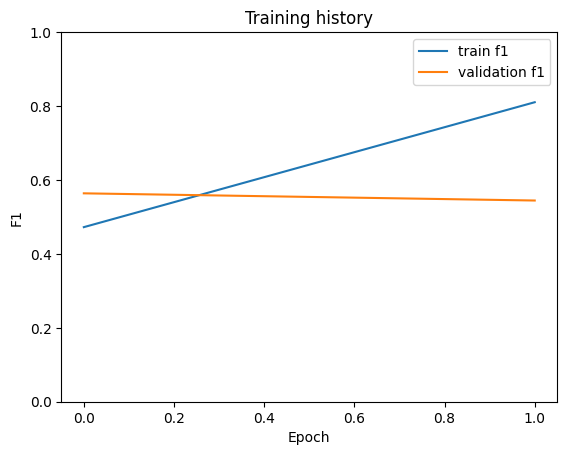

In [ ]:
#plt.plot(history['train_acc'], label='train accuracy')
#plt.plot(history['val_acc'], label='validation accuracy')
plt.plot(history['train_f1'], label='train f1')
plt.plot(history['val_f1'], label='validation f1')

plt.title('Training history')
#plt.ylabel('Accuracy')
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);